
<h1 id='part1'>The CRISP-DM Process (Cross Industry Process for Data Mining)</h1>

###  The following are the list of questions I would like to answer

1.  Can you describe the vibe of each Boston neighborhood using listing descriptions?
2.  Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston? 
3.  How much AirBNB homes are earning in certain time frames and areas?
4.  If there is anything about the properties that helps you predict price?

#### A look at the data 

1. We load all the data we need 
2. Take a simple look of our data, such as column names, shape, column types, etc
3. Fix data type if we need to


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
%matplotlib inline

df = pd.read_csv('./Blistings.csv')
B_review = pd.read_csv('./Breviews.csv')
B_calendar = pd.read_csv('./Bcalendar.csv')

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [52]:
print(df.columns)
print(df.shape)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

As we can see listing data has 95 columns and 3585 rows, contains data including id, host information(name, host_since, picture etc), property information(neightbourhood, room type, accomodates, etc), reveiw information (date of first and last review, overall review score etc ), legal information and price

We notice df.price has $ mark, I want to remove it before we move to Q1, also check data.description and correlation

In [53]:
#remove $ from price
df['price'] = (df['price'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

df['host_since'] = pd.to_datetime(df['host_since'])

The following are simple data descriptions to help us understand the data better

In [54]:
df.describe(include=[object]) #.neighbourhood_cleansed

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,...,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1269,1859,...,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/12147973,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,"The unit is stylishly designed for comfort, va...",none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...",...,$0.00,today,2016-09-06,2016-04-05,2016-09-05,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,...,2211,833,3585,23,118,3585,2991,1582,3518,3348


##### What info can a fancy correlation plot give us

We want to figure out data features that may can help us predict price, so in this corr plot, we can see corr(price, sqft)= 0.45, corr(price,accomodates)=0.44, etc. So far, we know these features are relatively highly correalted to price compared to other numberic columns in Boston Lisiting data. 

But, will it be useful for our price model? 

We need to take another look of the data, like check NA values


In [55]:
corr=df.corr()

cmap = cmap=sn.diverging_palette(5, 250, as_cmap=True)

def magnify():
    '''
    set up a fancy style for the correlation table
    1.font size to what we like 7ft
    2.padding to what we like 0em 0em
    3.hover, font size to a noticeable size compared to oringinal. 
      if we point to a cell, it will automatically become to 12pt from 7pt, so its noticeable
    4.hover column/row, 
      4.1 if we point to a column name,the pointed column's font size and whole column will automatically 
          change to font 12pt and wider cell compared to oringinal cell width for the whole selected column. 
      4.2 if we point to a row name,the pointed row's font size and whole row will automatically 
          change to font 12pt and higher cell width compared to oringinal cell width for the whole selected row. 
      In a word, make it more noticeable
    '''
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



C:\Users\ruoru\AppData\Local\Temp/ipykernel_18408/3834043071.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\
C:\Users\ruoru\.conda\envs\style-transfer\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\ruoru\.conda\envs\style-transfer\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
id,1.00,nan,0.57,-0.05,-0.05,nan,0.09,-0.01,-0.05,-0.01,-0.06,-0.04,-0.27,-0.06,-0.08,-0.05,-0.02,nan,-0.05,-0.04,-0.05,-0.21,-0.44,0.03,0.05,0.01,0.02,0.03,0.04,0.07,nan,nan,-0.04,0.22
scrape_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
host_id,0.57,nan,1.00,-0.09,-0.09,nan,0.02,-0.05,-0.10,-0.07,-0.07,-0.07,-0.20,-0.04,-0.07,-0.03,-0.02,nan,-0.02,-0.03,-0.03,-0.14,-0.24,0.01,0.02,-0.03,0.03,0.02,0.02,0.03,nan,nan,-0.09,0.18
host_listings_count,-0.05,nan,-0.09,1.00,1.00,nan,0.12,0.04,0.16,0.17,0.14,0.04,-0.03,0.17,-0.11,0.06,-0.00,nan,0.47,0.42,0.38,0.06,-0.14,-0.13,-0.18,-0.02,-0.21,-0.25,0.02,-0.21,nan,nan,0.97,-0.19
host_total_listings_count,-0.05,nan,-0.09,1.00,1.00,nan,0.12,0.04,0.16,0.17,0.14,0.04,-0.03,0.17,-0.11,0.06,-0.00,nan,0.47,0.42,0.38,0.06,-0.14,-0.13,-0.18,-0.02,-0.21,-0.25,0.02,-0.21,nan,nan,0.97,-0.19
neighbourhood_group_cleansed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.09,nan,0.02,0.12,0.12,nan,1.00,0.32,0.05,-0.02,-0.05,-0.01,-0.07,0.20,-0.02,0.02,0.02,nan,0.00,-0.02,-0.03,-0.10,-0.04,-0.01,-0.04,0.00,-0.07,-0.05,0.23,-0.04,nan,nan,0.13,0.05
longitude,-0.01,nan,-0.05,0.04,0.04,nan,0.32,1.00,0.08,0.01,0.02,0.03,0.06,0.17,0.02,-0.02,0.02,nan,0.03,0.04,0.05,0.05,0.08,0.02,0.00,0.05,-0.01,-0.01,0.04,-0.00,nan,nan,0.05,0.11
accommodates,-0.05,nan,-0.10,0.16,0.16,nan,0.05,0.08,1.00,0.35,0.72,0.82,0.49,0.44,0.50,-0.04,-0.01,nan,0.12,0.10,0.10,0.06,-0.00,0.04,0.02,0.09,-0.01,-0.01,0.01,-0.01,nan,nan,0.15,0.01
bathrooms,-0.01,nan,-0.07,0.17,0.17,nan,-0.02,0.01,0.35,1.00,0.43,0.35,0.47,0.25,0.11,0.02,-0.01,nan,0.12,0.11,0.09,0.05,-0.03,0.00,-0.02,0.03,-0.05,-0.05,-0.03,-0.01,nan,nan,0.17,-0.05


In [56]:
## another corr plot for blog
df_corr = df[['latitude', 'longitude',
        'accommodates',
       'bathrooms', 'bedrooms', 'beds',  'square_feet',
       'price', 
       'minimum_nights',
       'maximum_nights',
       'number_of_reviews',
       'reviews_per_month','review_scores_rating']].astype(float)

corr=df_corr.corr()

cmap = cmap=sn.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]



corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '50px', 'font-size': '8pt'})\
    .set_caption("Correlation Plot")\
    .set_precision(2)\
    .set_table_styles(magnify())
           

C:\Users\ruoru\AppData\Local\Temp/ipykernel_18408/450850150.py:29: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,review_scores_rating
latitude,1.00,0.32,0.05,-0.02,-0.05,-0.01,-0.07,0.20,0.02,0.02,-0.04,0.05,-0.01
longitude,0.32,1.00,0.08,0.01,0.02,0.03,0.06,0.17,-0.02,0.02,0.08,0.11,0.02
accommodates,0.05,0.08,1.00,0.35,0.72,0.82,0.49,0.44,-0.04,-0.01,-0.00,0.01,0.04
bathrooms,-0.02,0.01,0.35,1.00,0.43,0.35,0.47,0.25,0.02,-0.01,-0.03,-0.05,0.00
bedrooms,-0.05,0.02,0.72,0.43,1.00,0.71,0.49,0.39,-0.00,-0.01,-0.04,-0.06,0.06
beds,-0.01,0.03,0.82,0.35,0.71,1.00,0.31,0.37,-0.02,-0.01,-0.01,-0.00,0.03
square_feet,-0.07,0.06,0.49,0.47,0.49,0.31,1.00,0.45,0.04,-0.12,-0.34,-0.29,-0.18
price,0.20,0.17,0.44,0.25,0.39,0.37,0.45,1.00,0.02,-0.01,-0.10,-0.16,0.11
minimum_nights,0.02,-0.02,-0.04,0.02,-0.00,-0.02,0.04,0.02,1.00,-0.00,-0.06,-0.11,-0.03
maximum_nights,0.02,0.02,-0.01,-0.01,-0.01,-0.01,-0.12,-0.01,-0.00,1.00,0.07,0.04,0.00


In [57]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

In [58]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print(no_nulls)

{'accommodates', 'guests_included', 'amenities', 'number_of_reviews', 'host_total_listings_count', 'host_url', 'name', 'picture_url', 'host_has_profile_pic', 'street', 'instant_bookable', 'host_verifications', 'bed_type', 'scrape_id', 'requires_license', 'state', 'last_scraped', 'id', 'host_since', 'description', 'smart_location', 'longitude', 'calendar_last_scraped', 'room_type', 'price', 'host_id', 'extra_people', 'host_listings_count', 'neighbourhood_cleansed', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_thumbnail_url', 'is_location_exact', 'country', 'minimum_nights', 'maximum_nights', 'availability_90', 'listing_url', 'latitude', 'availability_365', 'availability_60', 'host_identity_verified', 'experiences_offered', 'country_code', 'host_name', 'availability_30', 'cancellation_policy', 'calendar_updated', 'calculated_host_listings_count', 'host_is_superhost', 'host_picture_url'}


Now we see how many missing values for each column, what we gonna do with these missing values? I will come back later for this, now we want to move to Q1

#### Q1: Can you describe the vibe of each Boston neighborhood using listing descriptions? 

Method: My apporach is group same neighborhood together, next group same neighborhood together then count words from neighborhood_overview column, at the end we can select few key vibe word for different neighborhood

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64


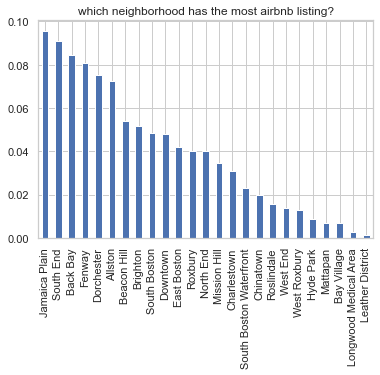

In [59]:
neighbour = df.neighbourhood_cleansed.value_counts() #.count()# total 25 neighbours
print(neighbour)
#prop ofairbnb listing in each neighbourhood in Bostion
(neighbour/df.shape[0]).plot(kind="bar");
plt.title("which neighborhood has the most airbnb listing?");

We can see there are total 25 neighborhoods in Boston, and Jamaica Plain has the most airbnb properties, Leather District has the least. Then before we move to count words from df.neighbour_overview, we also want to see price.mean() for each neighborhood. 

In [60]:
avg_price = pd.DataFrame(df.groupby('neighbourhood_cleansed')['price'].mean().round(0).sort_values(ascending=False)).reset_index()
avg_price

,neighbourhood_cleansed,price
0,South Boston Waterfront,306.0
1,Bay Village,267.0
2,Leather District,254.0
3,Back Bay,241.0
4,Downtown,236.0
5,Chinatown,232.0
6,Beacon Hill,224.0
7,Fenway,220.0
8,West End,210.0
9,South End,204.0


<AxesSubplot:xlabel='price', ylabel='neighbourhood_cleansed'>

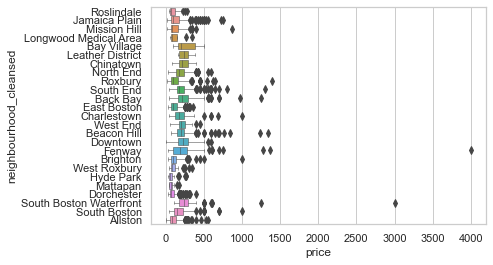

In [61]:
sn.set(style='whitegrid')
sn.boxplot(x='price',
           y='neighbourhood_cleansed',
    data =df,
          linewidth=0.5)

Average price for Jamaica Plain is 138 per night, the most expensive neighborhood is South Boston Waterfront which is 306 per night and South End is 204 for one night

I want to check vibe for South Boston Waterfront, South End and Jamaica Plain

why waterfront cost so much? from correlation we know price is correalted to room type, waterfront sounds like a fancy community, so maybe lots of airbnb properties are like big house or mansion, or high end condos. we could take a look of room_type.

In [62]:
room_type = df.loc[df['neighbourhood_cleansed'] == 'South Boston Waterfront'].room_type.value_counts(normalize=True)
print(room_type)

Entire home/apt    0.855422
Private room       0.144578
Name: room_type, dtype: float64


In [63]:
room_type = df.loc[df['neighbourhood_cleansed'] == 'Jamaica Plain'].room_type.value_counts(normalize=True)
print(room_type)

Private room       0.527697
Entire home/apt    0.457726
Shared room        0.014577
Name: room_type, dtype: float64


In [64]:
room_type = df.loc[df['neighbourhood_cleansed'] == 'South End'].room_type.value_counts(normalize=True)
print(room_type)

Entire home/apt    0.766871
Private room       0.211656
Shared room        0.021472
Name: room_type, dtype: float64


About 86% listing are entire house or condos in South Boston Waterfront

About 77% listing are entire house or condos in South End

About 53% listing are entire house or condos in Jamaica Plain   

Our approach for finding vibe for these 3 selected neighborhood is, group same neighborhhod's neighborhood_overview column, then count the words, select from top 80 most common words for each neighborhhod 

In [65]:
nei_South_Waterfront = df.loc[df['neighbourhood_cleansed'] == 'South Boston Waterfront']
results_SW = Counter()
nei_South_Waterfront['neighborhood_overview'].astype(str).str.lower().str.split().apply(results_SW.update)
results_SW.most_common(80)
#('seaport', 22)
# ('hottest', 10),
#  ('harborwalk', 10),
#'spirit', 6

[('the', 182),
 ('and', 89),
 ('of', 80),
 ('a', 68),
 ('to', 59),
 ('nan', 42),
 ('is', 39),
 ('in', 36),
 ('at', 31),
 ('–', 27),
 ('mi', 24),
 ('are', 22),
 ('seaport', 22),
 ('this', 22),
 ('walking', 21),
 ('city', 21),
 ('with', 18),
 ('for', 18),
 ('many', 18),
 ('you', 17),
 ('from', 17),
 ('south', 16),
 ('an', 15),
 ('or', 15),
 ('section', 15),
 ('boston.', 15),
 ('on', 15),
 ('distance', 14),
 ('boston', 14),
 ('located', 13),
 ('neighborhood', 12),
 ('restaurants,', 12),
 ('waterfront', 11),
 ('restaurants', 11),
 ('hottest', 10),
 ('boston,', 10),
 ('district', 10),
 ('harborwalk', 10),
 ('show', 10),
 ('new', 10),
 ('one', 10),
 ('there', 10),
 ('area', 10),
 ('has', 9),
 ('some', 9),
 ('best', 9),
 ('your', 9),
 ('city.', 8),
 ('public', 8),
 ("boston's", 8),
 ('will', 8),
 ('cruise', 8),
 ('as', 8),
 ('fort', 8),
 ('also', 8),
 ('walk', 8),
 ('take', 7),
 ('tour', 7),
 ('within', 7),
 ('bars', 7),
 ('harbor', 7),
 ('mi),', 7),
 ('access', 7),
 ('center,', 6),
 ('few', 

In [66]:
nei_Jamaica_Plain = df.loc[df['neighbourhood_cleansed'] == 'Jamaica Plain']
results_JP = Counter()
nei_Jamaica_Plain['neighborhood_overview'].astype(str).str.lower().str.split().apply(results_JP.update)
results_JP.most_common(80)

# restaurants 161
#'arboretum', 97),
#('diverse', 40),
#('brewery', 40),

[('the', 861),
 ('and', 809),
 ('a', 546),
 ('is', 474),
 ('of', 454),
 ('to', 368),
 ('jamaica', 274),
 ('in', 260),
 ('from', 165),
 ('neighborhood', 152),
 ('are', 147),
 ('with', 146),
 ('you', 143),
 ('for', 140),
 ('plain', 138),
 ('walk', 129),
 ('or', 105),
 ('as', 100),
 ('jp', 99),
 ('nan', 97),
 ('great', 96),
 ('all', 88),
 ('our', 88),
 ('restaurants', 87),
 ('we', 86),
 ('boston', 84),
 ('green', 84),
 ('on', 80),
 ('it', 79),
 ('there', 78),
 ('arnold', 76),
 ('pond', 75),
 ('restaurants,', 74),
 ('also', 73),
 ('has', 71),
 ('downtown', 70),
 ('park', 70),
 ('walking', 67),
 ('minute', 66),
 ('by', 65),
 ('can', 64),
 ('-', 64),
 ('within', 63),
 ('that', 61),
 ('just', 61),
 ('street', 60),
 ('arboretum', 57),
 ('boston.', 56),
 ('many', 54),
 ('at', 54),
 ('minutes', 52),
 ('pond,', 49),
 ('away', 47),
 ('an', 47),
 ('centre', 47),
 ('local', 46),
 ('shops', 46),
 ('diverse', 46),
 ('franklin', 45),
 ('one', 45),
 ('close', 43),
 ('city', 42),
 ("it's", 42),
 ('adams'

In [67]:
nei_South_End = df.loc[df['neighbourhood_cleansed'] == 'South End']
results_SE = Counter()
nei_South_End['neighborhood_overview'].astype(str).str.lower().str.split().apply(results_SE.update)
results_SE.most_common(80)
#('south', 245)
#('restaurants', 97)
#'newbury', 44)
#('historic', 32)
# ('financial', 29)

[('the', 862),
 ('and', 570),
 ('of', 334),
 ('is', 294),
 ('a', 250),
 ('south', 245),
 ('to', 239),
 ('in', 221),
 ('end', 173),
 ('for', 122),
 ('boston', 118),
 ('nan', 101),
 ('restaurants', 97),
 ('are', 88),
 ('neighborhood', 84),
 ('with', 83),
 ('copley', 78),
 ('most', 67),
 ('walk', 66),
 ('one', 65),
 ('back', 65),
 ('from', 63),
 ('best', 63),
 ('many', 60),
 ('–', 60),
 ('you', 59),
 ('walking', 57),
 ('this', 56),
 ('neighborhoods', 55),
 ('great', 53),
 ("boston's", 52),
 ('at', 52),
 ('on', 51),
 ('all', 50),
 ('bay', 49),
 ('it', 48),
 ('or', 48),
 ('has', 48),
 ('public', 47),
 ('end,', 46),
 ('restaurants,', 44),
 ('newbury', 44),
 ('beautiful', 43),
 ('also', 43),
 ('within', 40),
 ('by', 39),
 ('square', 38),
 ('steps', 38),
 ('street', 38),
 ('as', 37),
 ('boston’s', 37),
 ('minute', 36),
 ('district,', 35),
 ('located', 35),
 ('distance', 35),
 ('our', 34),
 ('very', 34),
 ('there', 33),
 ('find', 33),
 ('historic', 32),
 ('boston.', 32),
 ('will', 32),
 ('tremo

##### key words summarize 



| neighborhhod            | KW1         | KW2        | KW3      | KW4        |
|-------------------------|-------------|------------|----------|------------|
| Jamaica Plain          | aboretum       | downtown | diverse | brewery    |
| South End               | best | newbury    | historic | financial  |
| South Boston Waterfront | seaport     | walking    | hottest  | harborwalk |


#### Answers for Q1

Based on key words we can see, here are some conclusions we can get from these key words. However, I pick up those key words based on my perspective, I only use top 80 common words I can find from neighborhood overview, and most of the time I do not only caring about words frequency, but also unique noun or adjective words.

1. 
- Jamaica area has a 'aboretum 97', so words like 'green 84', 'pond 49', 'walking 67' mentioned many times; 
- I did not include key word 'downtown 70' in the table, but 'downtown' could mean Jamaica Plain is downtown area or closer to downtown area or negative impact such as very far to downtown or something, we can surely know if we choose to stay in Jamaica Plain, there is definitely something about 'downtown' will influence us; 
- there brewery in the neighborhood, maybe thats why there are any resturants in that area. 
- Diverse could mean culture diverse, or means you can easily find anything from different country in Jamaica Plain 

2. 
- South End probably is the best neighborhood we can choose, word 'best 63' comes up many times
- Key word 'newbury 44' sounds like a small area or maybe a street name beacsue word 'avenue 30', 'newbury' could be some place we can find lots of 'resturants 97', 'historic 32' buildings or feelings
- it may has financial district or something to do with 'financial 29'
- I feel like South End is downtown Boston, historical budlings, lots of resturants, financial district, etc make me believe South End is a place at least like Downtown Boston

3. 
- words frequencies are relative low for South Boston Waterfront, Inthink maybe beacuse not too many airbnb lisitng in South Boston Waterfront (total 83 lisitng).
- its not surprising we find 'seaport 28'in waterfront neighborhood, 'walking 21' and 'harbour walk 10'.'hottest 10' make me consider there could be a beach so people can swim 
- way less 'resturants 12', I think South Boston Waterfront is a peaceful neighborhood if we want to enjoy quite and peaceful vacation in a luxury property.    

####  Q2 Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

Approach: count total number of new host every year and count total number of review for each year. if  we see both has uptrend, then we know there is a general upward trend of both new airbnb listing and total airbnb visitors

In [68]:
df['host_since'] = pd.to_datetime(df['host_since'])
Host=df.groupby([df['host_since'].dt.year.rename('year')])['id'].agg({'count'})##so its incresing #host
B_review['date'] = pd.to_datetime(B_review['date'])
Traveller=B_review.groupby([B_review['date'].dt.year.rename('year')])['listing_id'].agg({'count'})
Host_to_Traveller = (pd.merge(Host, Traveller, on="year",how="outer")).rename(columns={'count_x': 'number_of_new_host', 'count_y': 'number_of_reviews'})

print(Host_to_Traveller)

      number_of_new_host  number_of_reviews
year                                       
2008                   3                NaN
2009                 110               20.0
2010                  95              200.0
2011                 222              664.0
2012                 300             1316.0
2013                 575             2965.0
2014                 836             9272.0
2015                1011            23814.0
2016                 433            30024.0


##### Answer for Q2

   As we can see from this table, at 2008 only 3 airbnb listings and no reviews, then both new lisitings and new reviews go upward every year. New airbnb listing reaches highest at year 2015, 1011 new airbnb listings following with total 23814 reviews (second highest). Travel to Boston and stay with Airbnb become very pupolar in 2016 since total number of new reviews reaches highest 30024 for year 2016. 
   
   So, we can conclude that there is a general upward trend of both new airbnb listing and total airbnb visitors. 

#### Q3: How much AirBNB homes are earning in certain time frames and areas?

Method: frist we count all the reviews in month year time frames, like lets see 2009 Jan 3 reviews, 2009 Feb 10 reviews etc...then we use column host_since to unselect new listing after the centain time frames we want to calculate, next we calculate total listing in whole Boston, count how many listing in each 25 neighborhood, in other words, proprotion, #host in South End divide by total host in Boston, then multiply to total review counts, so that we can estimate avg stays, basically the idea is: 
 
$$
R = (a / A) * m * p * (C/r)
$$
- R means Revenue
- any time range, we can choose any year any month from 2009 to 2016, then calculate the following items in this range
- a = listing in a neighborhood
- A = total listing in Boston
- m = avg minimum stay for a neighborhood, one visit could mean more than one night
- p = avg price for a neighborhood
- C = total number of reviews
- r = review rate, not all guest would leave a review, based on airbnb, review rate is about 70%[Go to the Web Site](https://www.quora.com/What-percent-of-Airbnb-hosts-leave-reviews-for-their-guests)

Finnally we will get a dataframe contain Revenue for each neighborhood in Boston in our designated time range

In [69]:
## get review df ready, count total number of reviews for each month and year
review = B_review.groupby([(B_review.date.dt.year),(B_review.date.dt.month)])['comments'].count()
review.index = review.index.set_names(['Year', 'Month'])
review = review.reset_index() 
review['Date'] = pd.to_datetime(review[['Year', 'Month']].assign(Day=1))
review = review [['Date', 'comments']]
review ['Date'] = pd.to_datetime(review['Date'])

In [70]:
##get only useful columns from df,
df_listing = df [['id','host_since','price','neighbourhood_cleansed','minimum_nights']]


In [71]:
def Revenue(df1, df2, Time_start,Time_end,review_rate = 0.7):
    
    ## change datetime to pd.datetime
    Time_start =  pd.to_datetime(Time_start)
    Time_end = pd.to_datetime(Time_end)
    
    ##use df1 = review data, which has month/year and associated review counts
    
    ## mask for df1 to get total review counts from Time_start to Time_end, we dont have days info, so set to first day for each month
    mask = (df1['Date'] > Time_start) & (df1['Date'] <= Time_end)
    ## total review counts
    R_count = df1.loc[mask]['comments'].sum()
    
    
    ## mask2 is for selectinf rows with data we need from df2, which has host_since, id, neighborhood_cleansed,minimum nights,etc 
    mask2 = df2['host_since'] < ( Time_end + pd.Timedelta(days=30))
    ## total listing on airbnb
    T_H_time = df2.loc[mask2]['id'].value_counts().sum()
    
    ## number of listing in each neighborhood from time start to time end
    No_listing = pd.DataFrame(df2.loc[mask2][['id','neighbourhood_cleansed']].value_counts().groupby(['neighbourhood_cleansed']).sum())
    
    ## average price of listing in each neighbor from start to end
    Price = pd.DataFrame(df2.loc[mask2].groupby(['neighbourhood_cleansed']).mean()['price'].round(0))
    
    ## avg min stay nights in each neighbor from start to end
    Nights = pd.DataFrame(df2.loc[mask2].groupby(['neighbourhood_cleansed']).mean()['minimum_nights'].round(0))
    
    ## put all info together
    df_R = pd.concat([No_listing, Price, Nights],axis=1, join='inner')
    
    ## rename column names
    df_R.columns = ['total_listing', 'price','nights']
    
    ## No listing in each neighbor / total listing, proportion we use to calcuate No.reviews for each neighborhood 
    df_R['proportion'] = df_R['total_listing'] / T_H_time
    
    ## calculate revenue for each neighbor from time start to time end, review rate comes from airbnb.com, only 70% guest left review after staying, so adjust back
    df_R['revenue'] = df_R['price'] * df_R['nights'] * df_R ['proportion'] * (R_count/review_rate)
    
    return df_R

df_R= Revenue(df1=review, df2 = df_listing, Time_start = '2015-01-01',Time_end ='2015-12-01')

In [72]:
df_R

,total_listing,price,nights,proportion,revenue
neighbourhood_cleansed,,,,,
Allston,230,111.0,4.0,0.072970,1.078962e+06
Back Bay,274,242.0,4.0,0.086929,2.802342e+06
Bay Village,19,247.0,3.0,0.006028,1.487535e+05
Beacon Hill,176,217.0,3.0,0.055838,1.210567e+06
Brighton,144,118.0,3.0,0.045685,5.385934e+05
Charlestown,98,201.0,4.0,0.031091,8.324869e+05
Chinatown,64,241.0,6.0,0.020305,9.777854e+05
Dorchester,238,92.0,3.0,0.075508,6.940349e+05
Downtown,154,238.0,3.0,0.048858,1.161754e+06


In [73]:
#dfi.export(df_R, 'revenue.png')

##### Answer Q3 

so we could estimate how much airbnb hosts are making in certain time frames and areas.

#### Q4:  If there is anything about the properties that helps you predict price?

Recall the correlation plot, we know sqft is realtively highly correlated to price, however, sqft columns has more than 90% missing value, so we wont use it. Some other columns id, url, host info or description wont help us at all too. So I select few columns for this linear model:

'accommodates','beds','bathrooms','price','review_scores_rating','host_is_superhost','neighbourhood_cleansed','room_type','property_type','bedrooms','bed_type','reviews_per_month'


We could check accomodates, room_type ,etc have higher correlation to price. As for categorical variables, 'host_is_superhost' is important me just the way it sounds, if you are a superhost, means more popular, more demand drives higher price, it also intutivly applys to 'room_type','property_type', etc

I tried to use all columns, but too many features lead a poor fitting model, so lets stick on selected columns 

Also why drop all na rows instead of fill it with some value, like mean, median. Reason is even 2 listings are in the same neighborhood they probably could accommodates different group size, more or less beds or washrooms, very differnt room type, a person could rent out the whole property, and another one in the same neighborhood just rent out a sofa bed. It's not as easy as just fill it with a value, it will make our models fit very poor, so just drop the rows has na and save all the pain

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df_lm = df[['accommodates','beds','bathrooms','price','review_scores_rating',
           'host_is_superhost','neighbourhood_cleansed','room_type','property_type','bedrooms','bed_type','reviews_per_month']]

In [75]:
#create dummy vars
def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [76]:
def clean_fit_linear_mod(df, test_size=.3, rand_state=42):
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).columns
    df=create_dummy_df(df, cat_vars, dummy_na=False)
    
    #drop all the rows that has na value
    df = df.dropna(subset=df.columns, axis=0)
    
    X=df.drop(['price'],axis=1)
    y=df['price']
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_lm)


C:\Users\ruoru\.conda\envs\style-transfer\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [77]:
print(train_score,test_score)

0.6590380757185105 0.5877456927138975


In [78]:
def coef_weights(coefficients, X_train):
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
27,neighbourhood_cleansed_South Boston Waterfront,115.604946,115.604946
7,neighbourhood_cleansed_Back Bay,92.313333,92.313333
12,neighbourhood_cleansed_Chinatown,86.870441,86.870441
14,neighbourhood_cleansed_Downtown,86.062473,86.062473
9,neighbourhood_cleansed_Beacon Hill,84.958848,84.958848
8,neighbourhood_cleansed_Bay Village,71.703632,71.703632
28,neighbourhood_cleansed_South End,70.927516,70.927516
19,neighbourhood_cleansed_Leather District,70.852345,70.852345
16,neighbourhood_cleansed_Fenway,60.970388,60.970388
32,room_type_Shared room,-58.604854,58.604854


In [79]:
#dfi.export(coef_df, 'coef.png')

#### Answer for Q4

Features we found that help us predict price

- Neighborhood appears to be one of the top indicators for price
- Room type and property type appear to be one of the top indicators for price
- also bedroom is one of the top indicator for price too

